In [7]:
import pandas as pd

In [9]:
df=pd.read_csv('blogs.csv')

In [11]:
df

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

In [13]:
df.shape

(2000, 2)

In [15]:
df.size

4000

In [17]:
df.describe()

Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100

In [19]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [21]:
df.dtypes

Data      object
Labels    object
dtype: object

In [23]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [25]:
df.head()

Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

In [27]:
import nltk

In [29]:
from nltk.corpus import stopwords

In [31]:
from nltk.tokenize import word_tokenize

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
print(df['Labels'].value_counts())

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords((common words like 'the', 'is' that don’t add much meaning))
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # To preprocess the function
    return ' '.join(tokens)

In [53]:
import string
# Apply preprocessing to the 'Data' column
df['cleaned_data'] = df['Data'].apply(preprocess_text)
df['cleaned_data']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: cleaned_data, Length: 2000, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [77]:
#  Prepare the text and labels
y = df['Labels']  # Labels (categories)

In [79]:
x=tfidf.fit_transform(df['cleaned_data']).toarray() # Transform the text data
x  # features (blog text)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [80]:
#  Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
#  TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features for efficiency

In [85]:
## Train the Naive Bayes model
model = MultinomialNB()
model

MultinomialNB()

In [87]:
model.fit(x_train,y_train)

MultinomialNB()

In [91]:
y_pred=model.predict(x_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.med', 'sci.crypt', 'comp.windows.x',
       'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'rec.autos',
       'comp.graphics', 'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'soc.religion.christian',
       'comp.os.ms-windows.misc', 'rec.sport.baseball',
       'soc.religion.christian', 

In [95]:
# Evaluate the Model
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8225
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88   

In [97]:
## Sentimental analysis

In [101]:
!pip install -U textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   - -------------------------------------- 30.7/626.3 kB 1.4 MB/s eta 0:00:01
   ----- --------------------------------- 92.2/626.3 kB 751.6 kB/s eta 0:00:01
   ----- --------------------------------- 92.2/626.3 kB 751.6 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 655.8 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/626.3 kB 655.8 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 754.9 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 754.9 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 754.9 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 754.9 kB/s eta 0:00:01
   --------------------- ---------------- 358.4/626.3 kB 676.0 kB/s eta 0:00:01
   ------------------------ ------------- 409.6/626

In [99]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
from textblob import TextBlob

In [61]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [105]:
# Analyze sentiment for each blog post
# Define a function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [107]:
# Apply sentiment analysis on the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [109]:
df['Sentiment']

0       Positive
1       Negative
2       Positive
3       Positive
4       Positive
          ...   
1995    Positive
1996    Positive
1997    Positive
1998    Positive
1999    Positive
Name: Sentiment, Length: 2000, dtype: object

In [111]:
df['Sentiment'].value_counts()

Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64

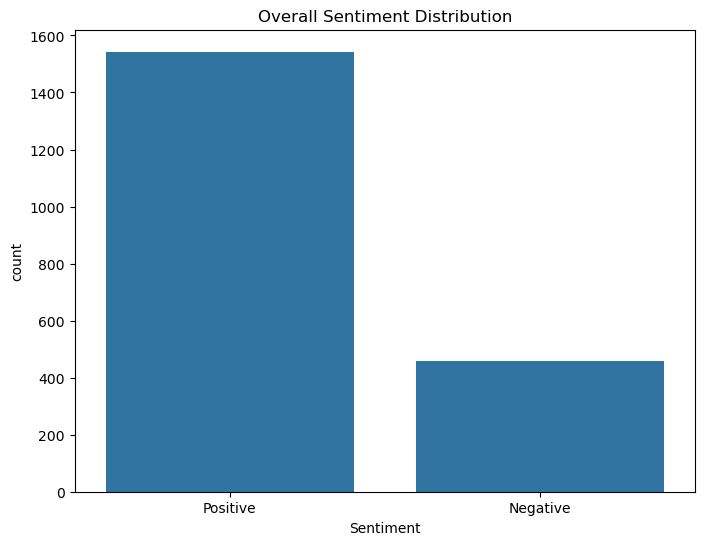

In [113]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment',data=df)
plt.title('Overall Sentiment Distribution')
plt.show() ## across all category

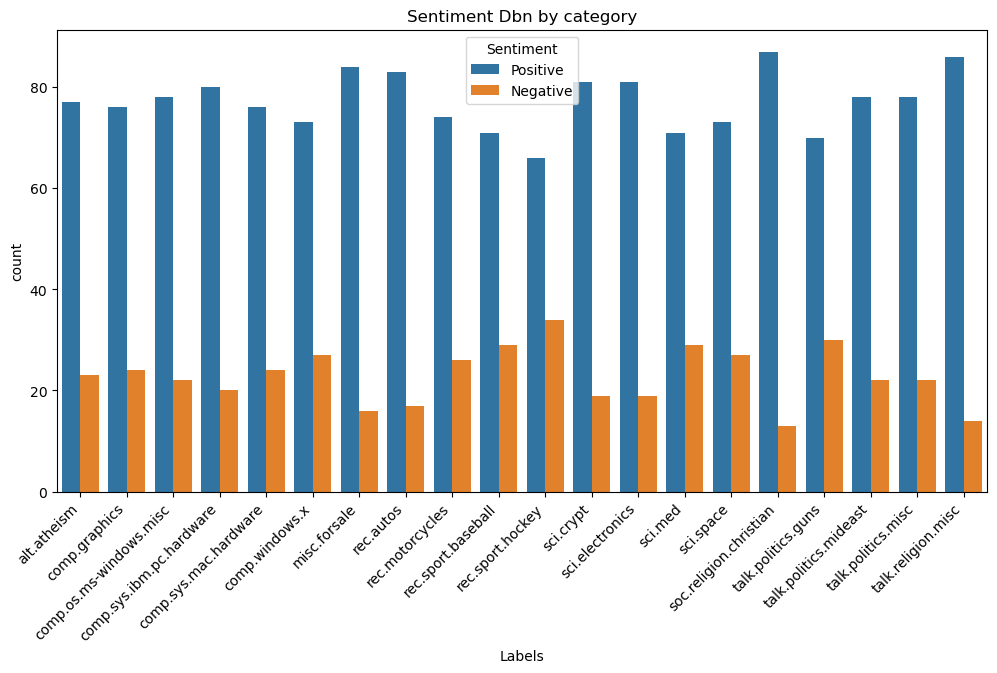

In [115]:
plt.figure(figsize=(12, 6))# Sentiment distribution within each category
sns.countplot(x='Labels', hue='Sentiment', data=df)
plt.xticks(rotation=45,ha='right') # Rotate x-axis labels for better readability
plt.title('Sentiment Dbn by category')
plt.show()

In [117]:
# Group by categories and sentiment
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack()
print(sentiment_distribution)

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [119]:
!pip install seaborn wordcloud

In [121]:
from wordcloud import WordCloud

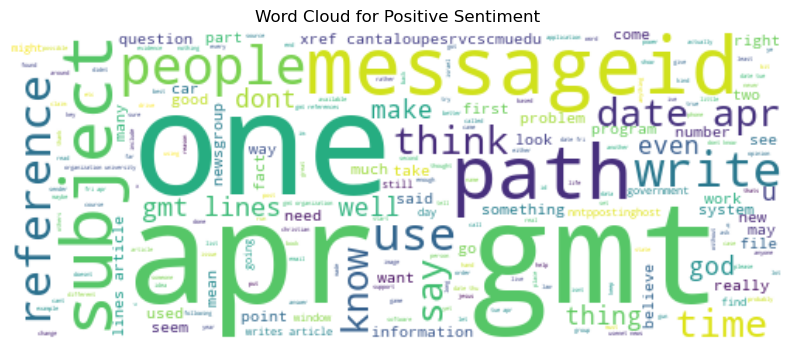

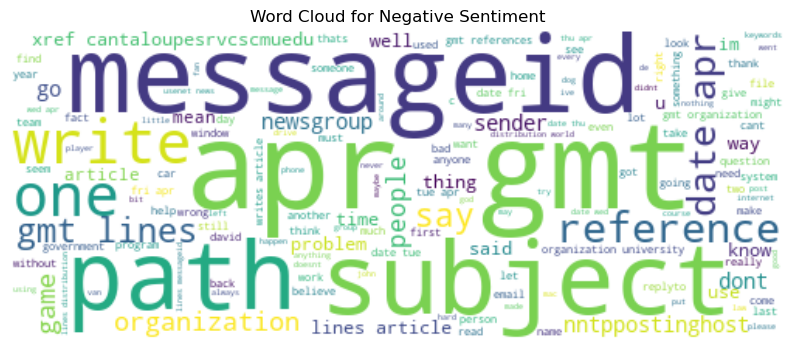

In [123]:
for sentiment in df['Sentiment'].unique():
    text = ' '.join(df[df['Sentiment'] == sentiment]['cleaned_data'])
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show() # Generate word cloud for each sentiment

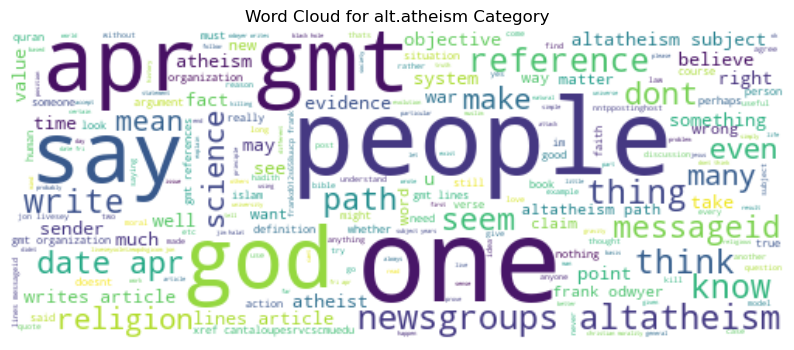

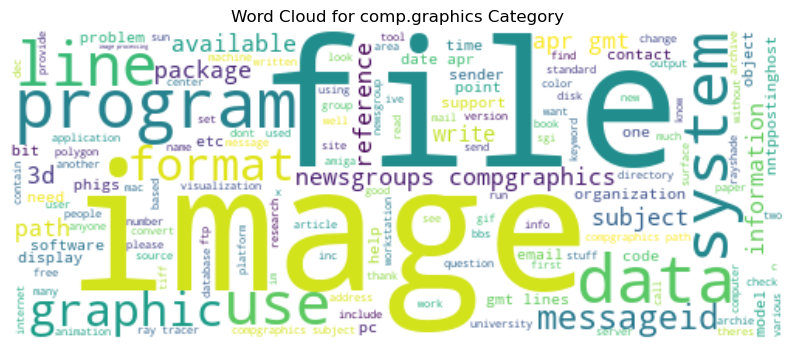

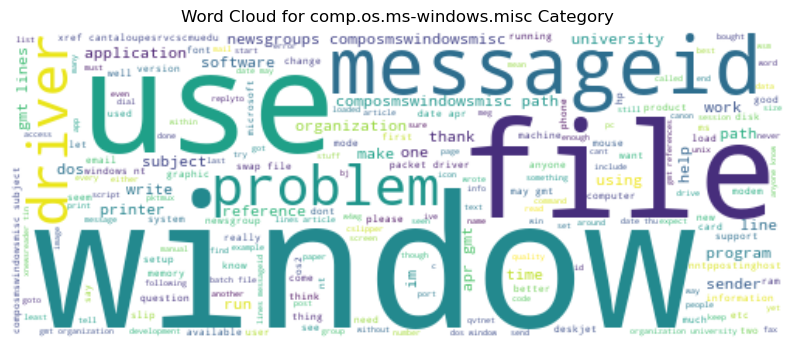

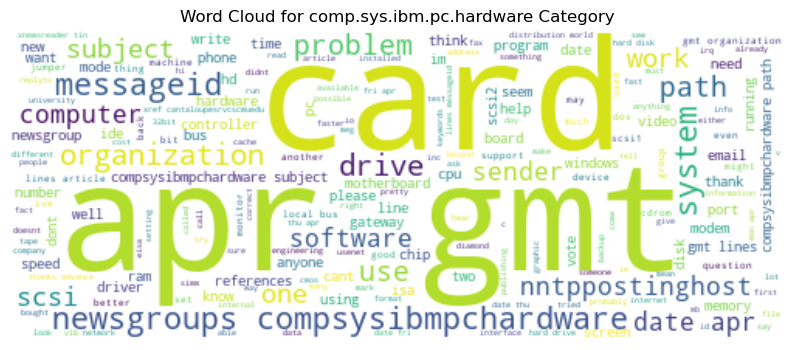

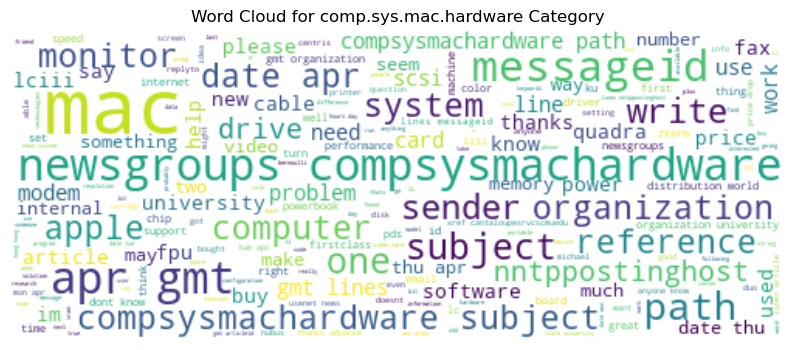

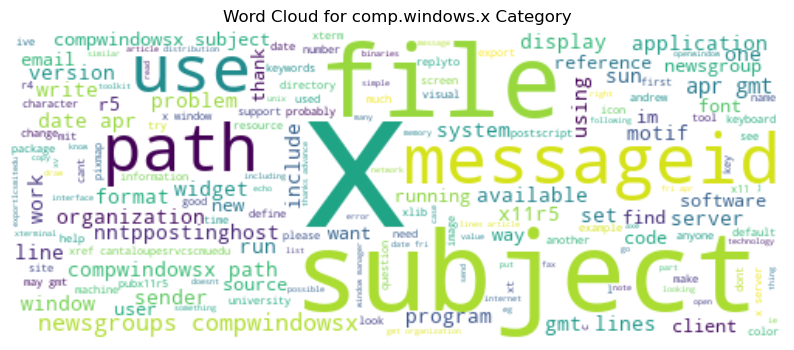

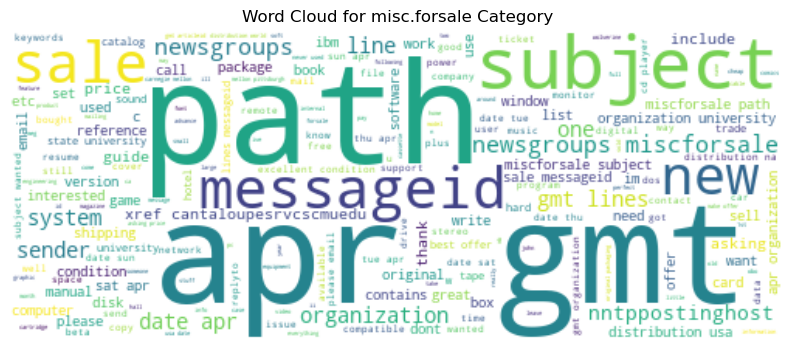

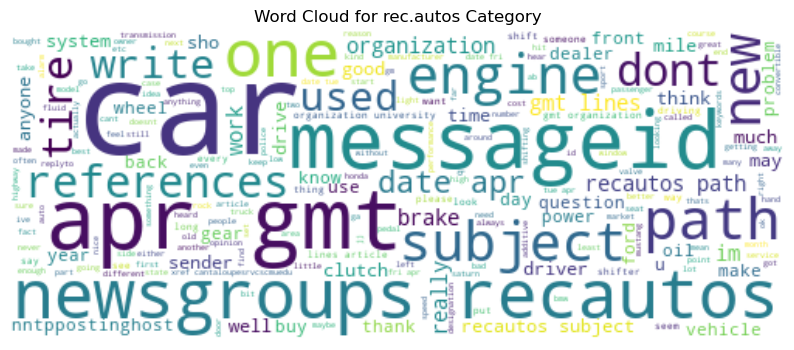

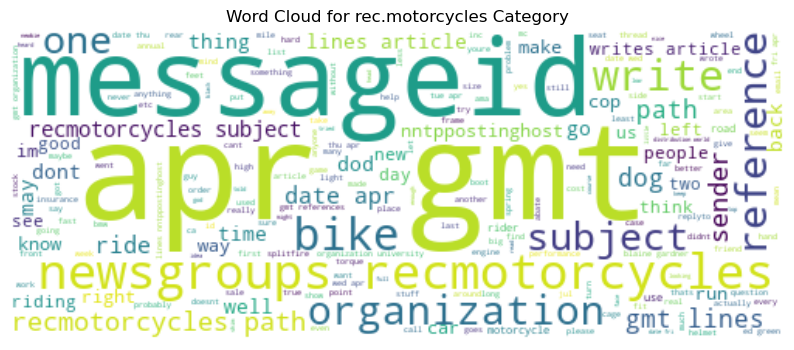

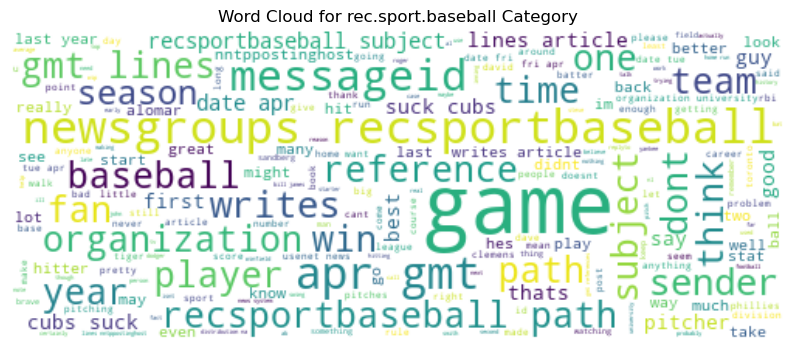

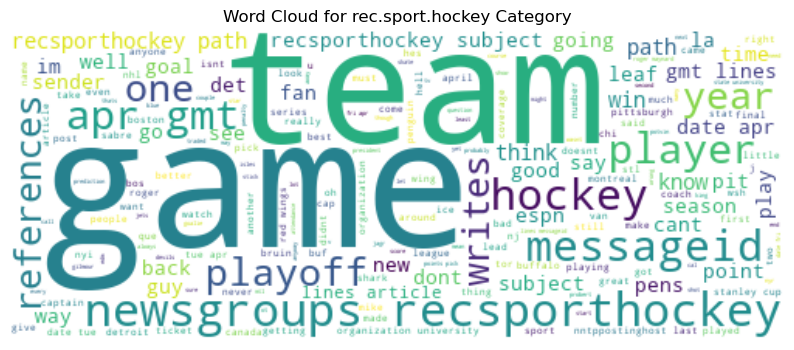

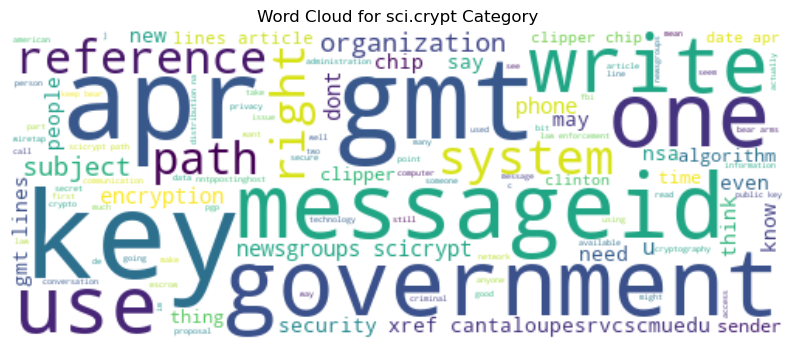

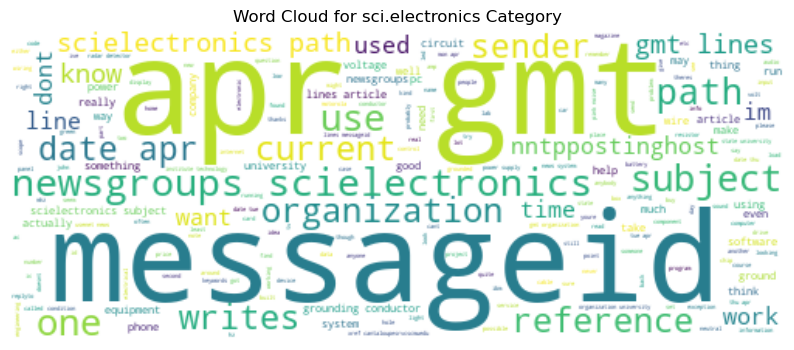

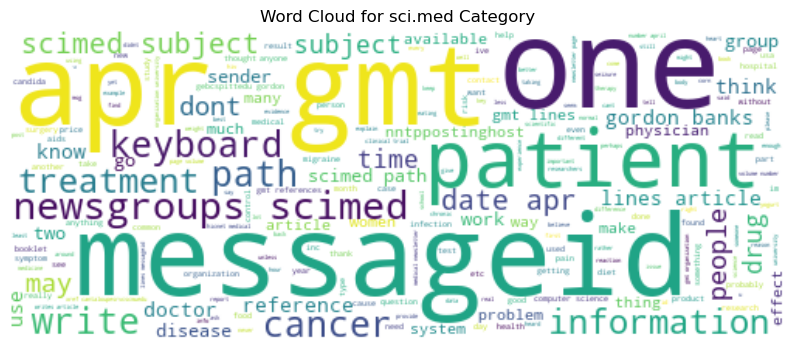

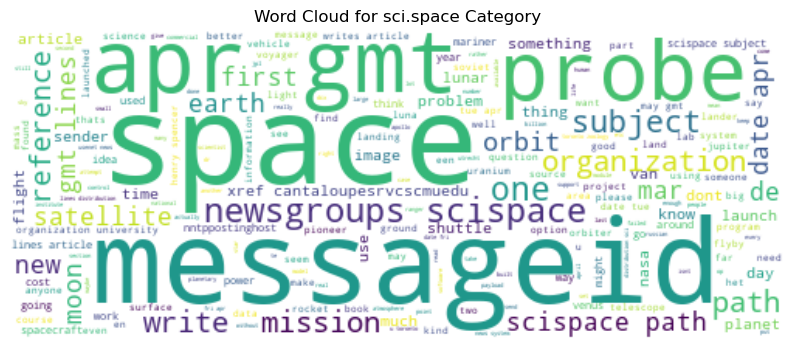

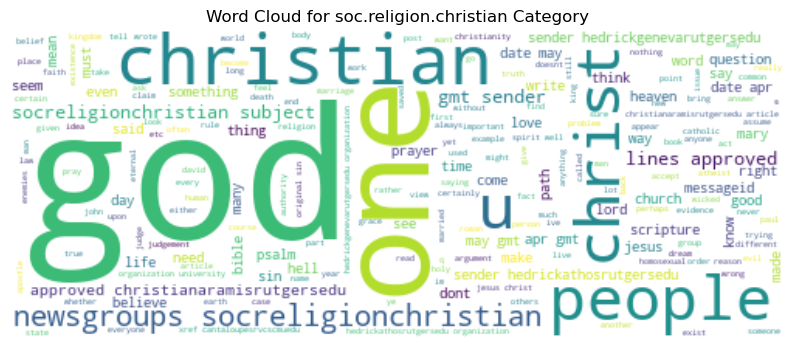

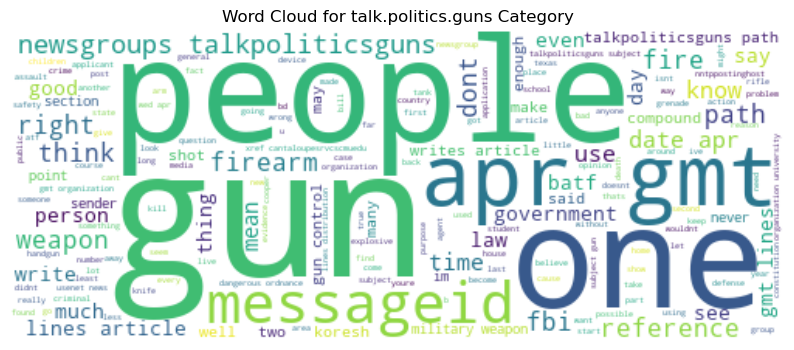

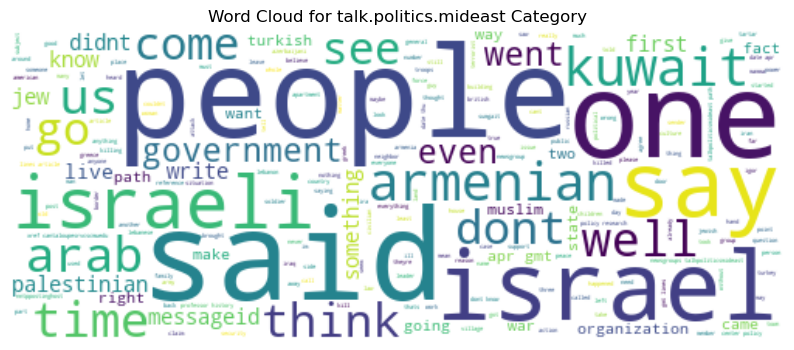

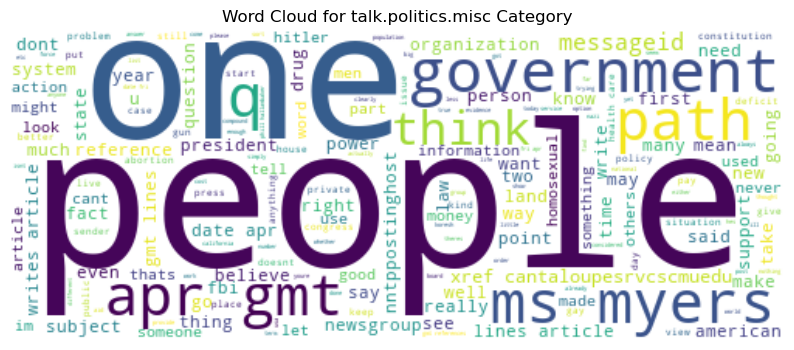

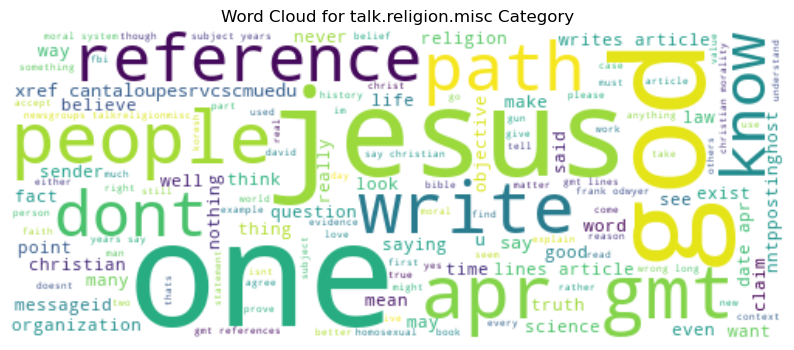

In [125]:
for category in df['Labels'].unique():
    text = ' '.join(df[df['Labels'] == category]['cleaned_data'])
    wordcloud = WordCloud(width=500, height=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show() # Generate word cloud for each category

In [127]:

# Display summary of sentiment distribution
for category in df['Labels'].unique():
    print(f"\nCategory: {category}")
    print(sentiment_distribution.loc[category])



Category: alt.atheism
Sentiment
Negative    23
Positive    77
Name: alt.atheism, dtype: int64

Category: comp.graphics
Sentiment
Negative    24
Positive    76
Name: comp.graphics, dtype: int64

Category: comp.os.ms-windows.misc
Sentiment
Negative    22
Positive    78
Name: comp.os.ms-windows.misc, dtype: int64

Category: comp.sys.ibm.pc.hardware
Sentiment
Negative    20
Positive    80
Name: comp.sys.ibm.pc.hardware, dtype: int64

Category: comp.sys.mac.hardware
Sentiment
Negative    24
Positive    76
Name: comp.sys.mac.hardware, dtype: int64

Category: comp.windows.x
Sentiment
Negative    27
Positive    73
Name: comp.windows.x, dtype: int64

Category: misc.forsale
Sentiment
Negative    16
Positive    84
Name: misc.forsale, dtype: int64

Category: rec.autos
Sentiment
Negative    17
Positive    83
Name: rec.autos, dtype: int64

Category: rec.motorcycles
Sentiment
Negative    26
Positive    74
Name: rec.motorcycles, dtype: int64

Category: rec.sport.baseball
Sentiment
Negative    29
Posi

In [131]:
# Summarize findings
sentiment_counts = df['Sentiment'].value_counts()
print(f"Sentiment Distribution in Blog Posts:")
print(sentiment_counts)

Sentiment Distribution in Blog Posts:
Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


In [141]:
acc_score=accuracy_score(y_test, y_pred)
acc_score

0.8225

In [143]:
class_report=classification_report(y_test, y_pred)
class_report

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.50      0.83      0.62        18\n           comp.graphics       0.79      0.83      0.81        18\n comp.os.ms-windows.misc       0.86      0.82      0.84        22\ncomp.sys.ibm.pc.hardware       0.76      0.76      0.76        25\n   comp.sys.mac.hardware       0.83      0.90      0.86        21\n          comp.windows.x       0.91      0.84      0.88        25\n            misc.forsale       0.82      0.78      0.80        18\n               rec.autos       0.89      0.94      0.92        18\n         rec.motorcycles       0.94      0.94      0.94        16\n      rec.sport.baseball       0.77      0.94      0.85        18\n        rec.sport.hockey       0.88      1.00      0.94        15\n               sci.crypt       0.95      0.95      0.95        19\n         sci.electronics       0.62      0.62      0.62        16\n                 sci.med       0.88      0.88      0.88    

#### Summary:

Naive Bayes Performance: We expect the classifier to perform reasonably well, but it could struggle with class imbalance or ambiguous text. By looking at precision, recall, and F1-score, we can assess how well the model identifies each category.
Sentiment Analysis Implications: The sentiment analysis provides additional insights into the emotional tone of blog posts, which can be valuable for understanding the content and improving classification accuracy. The sentiment distribution can also indicate which categories are more opinion-driven versus informational.